In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import datetime

In [2]:
df = pd.read_csv(r"H:\DataScience-Lab\Sem-2\Time series analysis & forecasting\files\Patient Satisfaction Survey Data.csv")
df

,Observation,Age(x1),Severity(x2),Satisfaction(y)
0,1,55,50,68
1,2,46,24,77
2,3,30,46,96
3,4,35,48,80
4,5,59,58,43
5,6,61,60,44
6,7,74,65,26
7,8,38,42,88
8,9,27,42,75
9,10,51,50,57


In [3]:
df.rename({"Age(x1)":"Age","Severity(x2)":"Severity","Satisfaction(y)":"Satisfaction"},inplace=True,axis=1)

In [4]:
df.head()

,Observation,Age,Severity,Satisfaction
0,1,55,50,68
1,2,46,24,77
2,3,30,46,96
3,4,35,48,80
4,5,59,58,43


In [5]:
from sklearn.linear_model import LinearRegression
# Extract features (X) and target variable (y)
X = df[['Age', 'Severity']]
y = df['Satisfaction']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 143.47201181279553
Coefficients: [-1.03105341 -0.55603781]


In [6]:
# X = np.column_stack((X, np.ones(len(X))))
# X

In [7]:
# Calculate the coefficients using the normal equation
X_transpose_X = np.dot(X.T, X)
X_transpose_y = np.dot(X.T, y)

In [8]:
X_transpose_X

array([[69881, 60814],
       [60814, 56790]], dtype=int64)

In [9]:
X_transpose_y

array([76487, 70426], dtype=int64)

In [10]:
coefficients = np.linalg.inv(X_transpose_X).dot(X_transpose_y)
coefficients

array([0.22505589, 0.99910989])

In [11]:
# Calculate the coefficients using the formula
beta = np.linalg.inv(X.T @ X) @ X.T @ y

print('Intercept:', beta[0])
print('Coefficients:', beta[1:])

Intercept: 0.22505589335259718
Coefficients: 1    0.99911
dtype: float64


In [12]:
print(f'Satisfaction = {model.intercept_} + ({model.coef_[0]} * Age) + ({model.coef_[1]} * Severity)')

Satisfaction = 143.47201181279553 + (-1.0310534139856795 * Age) + (-0.5560378102300436 * Severity)


In [13]:
# X = df[['Age', 'Severity']]
# y = df['Satisfaction']


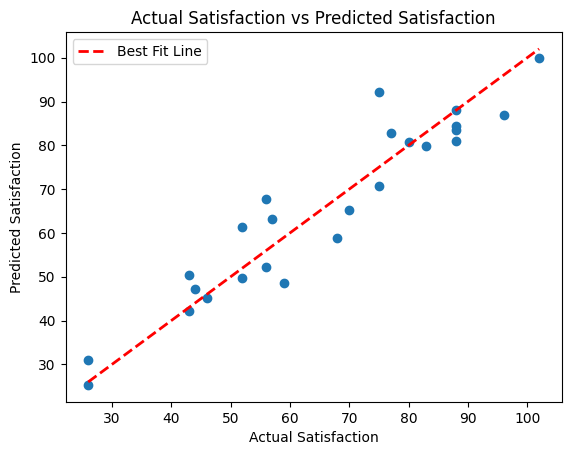

In [14]:
# Predicted values
predicted_satisfaction = model.predict(X)

# Actual values
actual_satisfaction = y

# Plot the best-fit line
plt.plot([min(actual_satisfaction), max(actual_satisfaction)], [min(actual_satisfaction), max(actual_satisfaction)], color='red', linestyle='--', linewidth=2, label='Best Fit Line')

# Plotting
plt.scatter(actual_satisfaction, predicted_satisfaction)
plt.title('Actual Satisfaction vs Predicted Satisfaction')
plt.xlabel('Actual Satisfaction')
plt.ylabel('Predicted Satisfaction')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error

# Calculate residuals
residuals = actual_satisfaction - predicted_satisfaction

# Calculate mean squared error
mse = mean_squared_error(actual_satisfaction, predicted_satisfaction)

# Print residual errors
print(f'Residual Errors:\n{residuals}')

# Print mean squared error
print(f'Mean Squared Error: {mse}')

Residual Errors:
0      9.037816
1     -5.698647
2      9.037330
3     -0.695327
4     -7.389667
5     -3.215485
6     -5.031602
7      7.061606
8    -17.279982
9     -6.086397
10   -11.696744
11     3.482312
12    -0.085863
13     2.178556
14     4.513366
15     4.770474
16     2.247393
17     0.869878
18     0.927644
19     3.769057
20    10.499277
21     0.679703
22    -9.278475
23     3.092659
24     4.291118
Name: Satisfaction, dtype: float64
Mean Squared Error: 44.58183797698442


In [16]:
# Calculate the coefficients using the formula
beta = np.linalg.inv(X.T @ X) @ X.T @ y

print('Intercept:', beta[0])
print('Coefficients:', beta[1:])

Intercept: 0.22505589335259718
Coefficients: 1    0.99911
dtype: float64


In [17]:
print(f'Satisfaction = {model.intercept_} + ({model.coef_[0]} * Age) + ({model.coef_[1]} * Severity)')

Satisfaction = 143.47201181279553 + (-1.0310534139856795 * Age) + (-0.5560378102300436 * Severity)


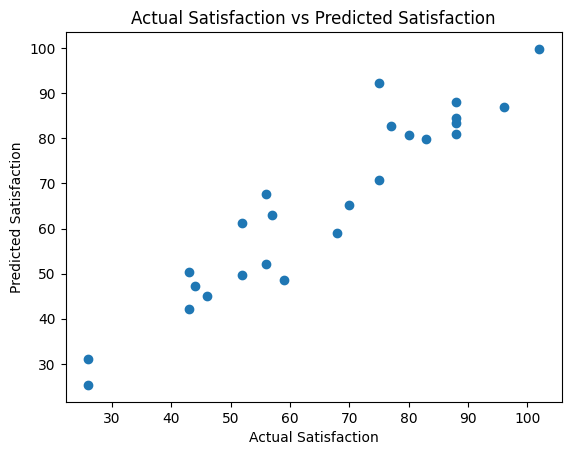

In [18]:
# Predicted values
predicted_satisfaction = model.predict(X)

# Actual values
actual_satisfaction = y

# Plotting
plt.scatter(actual_satisfaction, predicted_satisfaction)
plt.title('Actual Satisfaction vs Predicted Satisfaction')
plt.xlabel('Actual Satisfaction')
plt.ylabel('Predicted Satisfaction')
plt.show()

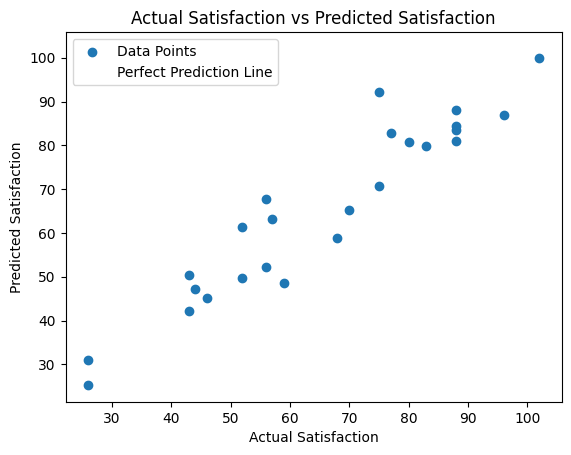

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Predicted values
predicted_satisfaction = model.predict(X)

# Actual values
actual_satisfaction = y

# Plotting
plt.scatter(actual_satisfaction, predicted_satisfaction, label='Data Points')
plt.plot([min(actual_satisfaction), max(actual_satisfaction)], [min(actual_satisfaction), max(actual_satisfaction)], color='red', linestyle='', label='Perfect Prediction Line')
plt.title('Actual Satisfaction vs Predicted Satisfaction')
plt.xlabel('Actual Satisfaction')
plt.ylabel('Predicted Satisfaction')
plt.legend()
plt.show()
